## connect to database

In [1]:
import pandas
import configparser
import psycopg2

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [3]:
connection = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        database = db
)

# q1

In [4]:
sql = 'select * from student'

In [5]:
df = pandas.read_sql(sql, connection)
df[:]

/tmp/ipykernel_8016/2250568094.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql(sql, connection)


,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,ISAT
3,s4@jmu.edu,s4,ISAT
4,s5@jmu.edu,s5,IA


# q2

In [8]:
sql = """select professor.p_name , course.c_name from professor
            inner join course on professor.p_email = course.p_email"""

In [9]:
df = pandas.read_sql(sql, connection)
df[:]

/tmp/ipykernel_8016/2250568094.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql(sql, connection)


,p_name,c_name
0,p2,mongodb
1,p3,facebook
2,p3,postgresql
3,p3,twitter


## q3

In [11]:
sql = """select c_number, count(*) as num_stu from enroll
            group by c_number
            order by num_stu desc
            """

/tmp/ipykernel_8016/3797080172.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql(sql, connection)


<Axes: xlabel='c_number'>

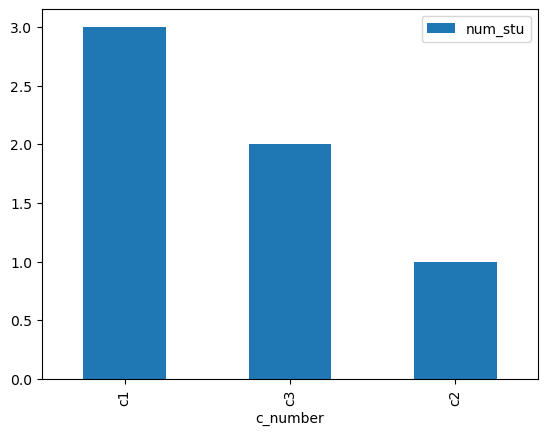

In [14]:
df = pandas.read_sql(sql, connection)
df.plot.bar(x = 'c_number',y = 'num_stu')

# q4

In [23]:
sql = """select professor.p_name, count(course.c_number) as num_course from professor
            inner join course on professor.p_email = course.p_email
            group by professor.p_name
            order by num_course desc
            """

/tmp/ipykernel_8016/3482891309.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql(sql, connection)


<Axes: xlabel='p_name'>

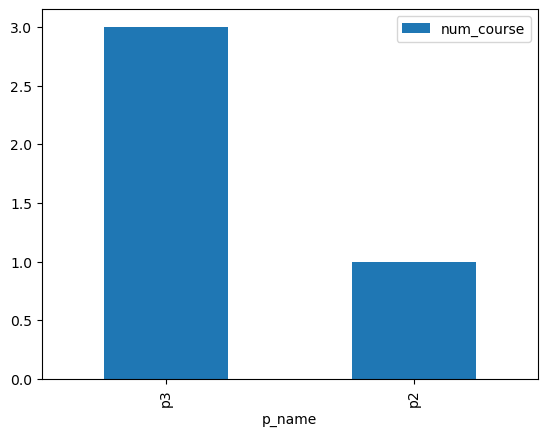

In [25]:
df = pandas.read_sql(sql, connection)
df.plot.bar(x='p_name',y='num_course')

# q5

In [28]:
sql = """insert into professor (p_email,p_name,office)
            values('p4@jmu.edu','p4','o4')
;
            select * from professor
            """

In [30]:
df = pandas.read_sql(sql, connection)
df[:]

/tmp/ipykernel_8016/2250568094.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql(sql, connection)


,p_email,p_name,office
0,p2@jmu.edu,p2,o2
1,p3@jmu.edu,p3,o3
2,p4@jmu.edu,p4,o4


In [31]:
sql = """insert into course (c_number,c_name,room,p_email)
            values('c5','linkedin','r2','p4@jmu.edu')
;
            select * from course
            """

In [32]:
df = pandas.read_sql(sql, connection)
df[:]

/tmp/ipykernel_8016/2250568094.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pandas.read_sql(sql, connection)


,c_number,c_name,room,p_email
0,c2,mongodb,r2,p2@jmu.edu
1,c4,facebook,r1,p3@jmu.edu
2,c1,postgresql,r1,p3@jmu.edu
3,c3,twitter,r1,p3@jmu.edu
4,c5,linkedin,r2,p4@jmu.edu


# q6